# CA2: Static Data Visualization with Python

Requirements
You are required to use the dataset contained within the file “drinks.csv” and identify the
5 countries who consume the most alcohol and then perform the following analysis:

1- Explain what you plan on doing with the data.

First, I import Pandas into Pyton, to manipulate the Dataframe. O also import matplotlib for plotting.

Second thing reading the files and save it in a variable called drinks_df.

After visualizing the data, I filter it, in order to identify the
5 countries who consume the most amount of alcohol and then perform the analysis.


In [31]:
import pandas as pd
#import matplotlib for plotting
import matplotlib.pyplot as plt

In [32]:
 drinks_df= pd.read_csv('drinks.csv')

In [33]:
drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [34]:
top_five = drinks_df.nlargest(5,"total_litres_of_pure_alcohol")

In [50]:
top_five

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,Europe
98,Lithuania,343,244,56,12.9,Europe
3,Andorra,245,138,312,12.4,Europe
68,Grenada,199,438,28,11.9,North America
45,Czech Republic,361,170,134,11.8,Europe


2. Generate a plot that details the number of Beer, Wine and Spirit Servings for each of the 5 top Countries.

For the next plot I choose a Stacked column chart.
Stacked column charts are great to show the parts of multiple totals. Each bar in this chart is divided into a number of sub-bars stacked end to end, each one corresponding to a level of the second categorical variable.


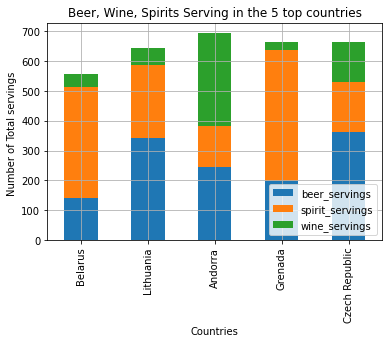

In [36]:
top_five_totals = top_five.plot(x="country", y=["beer_servings", "spirit_servings","wine_servings"],kind="bar", stacked=True)
plt.xlabel("Countries")
plt.ylabel("Number of Total servings ")
plt.title("Beer, Wine, Spirits Serving in the 5 top countries")


plt.grid()
plt.show()


3. Plot a graph depicting the distribution of the “Total litres of pure alcohol” in the top five countries.

For this plot, I choose the bar charts, I really think they are easier to read and helps visualize distribution of data.

This chart is clear and gives a lot of information about where the Total litres of pure alcohol is more in each of the Top 5 countries, I decided to show it in %.


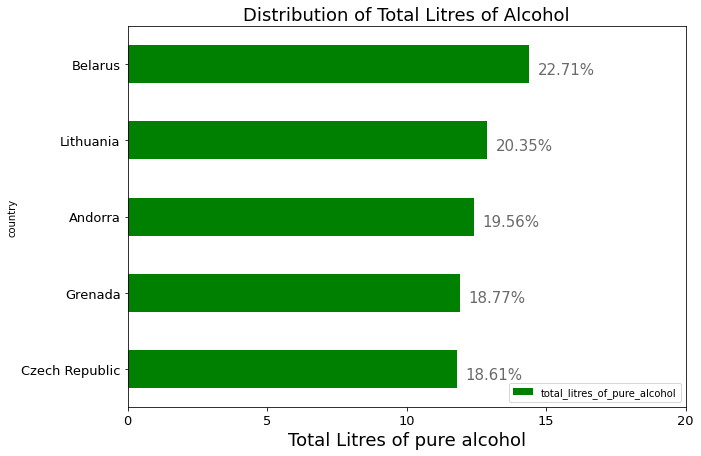

In [37]:
ax = top_five.plot(x ='country', y='total_litres_of_pure_alcohol',kind='barh', figsize=(10,7),
                                        color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Total Litres of Alcohol", fontsize=18)
ax.set_xlabel("Total Litres of pure alcohol", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()





4. Find out which continent consumed the largest “Total litres of pure alcohol”

For this plot, my choice is a pie chart.
Pie chats are good for displaying data for around 6 categories or fewer, because we have 6 continents, I fount it a good solution to show the percentage of total litres of alcohol per continent.

In [38]:
alcohol_df = drinks_df.groupby('continent').total_litres_of_pure_alcohol.sum()




In [39]:
alcohol_df

continent
Africa           159.4
Asia              95.5
Europe           387.8
North America    137.9
Oceania           54.1
South America     75.7
Name: total_litres_of_pure_alcohol, dtype: float64

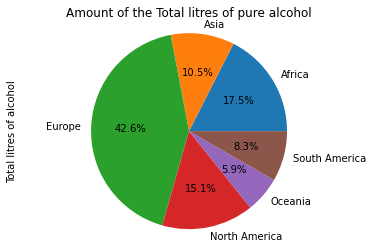

In [40]:
alcohol_df.plot(x ='continent', y='total_litres_of_pure_alcohol',kind="pie", autopct='%1.1f%%')
plt.ylabel("Total litres of alcohol")  
plt.title("Amount of the Total litres of pure alcohol")
plt.axis('equal')
plt.show()



    

5. Observe the average beer and wine servings by continent

For this next exercise I have to decide to filter the data again and get the average number of all drinks by continent.
After filter that data I drop the columns that I don't need for this exercise and make a groupedbar to visualize the results.
The reason why I choose the groupedbar chart, is because it would be easier to visualize two or more sets of categories for which I want to show amounts. With Groupebars I can also map the categories onto axis and show amounts by colour, via a heatmap.

In [41]:
average_df = drinks_df.groupby('continent').mean()

In [42]:
average_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [43]:
average_df.drop(['spirit_servings', 'total_litres_of_pure_alcohol'], axis='columns', inplace=True)


In [44]:
average_df



,beer_servings,wine_servings
continent,,
Africa,61.471698,16.264151
Asia,37.045455,9.068182
Europe,193.777778,142.222222
North America,145.434783,24.521739
Oceania,89.687500,35.625000
South America,175.083333,62.416667


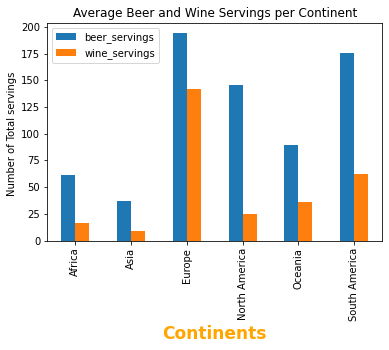

In [45]:
average_df.plot(kind="bar")
plt.xlabel('Continents', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.ylabel("Number of Total servings ")
plt.title("Average Beer and Wine Servings per Continent")
plt.show()